In [1]:
import nltk

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [5]:
emmaText = nltk.Text(emma)
emmaText.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

## load all in

In [6]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
import pandas as pd

In [11]:
text_stats = pd.DataFrame(columns=['num_chars','num_words','num_sents','num_vocab','textname'])
idx=0
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
#    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)
    text_stats.loc[idx]=[num_chars, num_words,num_sents,num_vocab,fileid[:-4]]
    idx+=1

In [12]:
text_stats.head()

,num_chars,num_words,num_sents,num_vocab,textname
0,887071.0,192427.0,7752.0,7344.0,austen-emma
1,466292.0,98171.0,3747.0,5835.0,austen-persuasion
2,673022.0,141576.0,4999.0,6403.0,austen-sense
3,4332554.0,1010654.0,30103.0,12767.0,bible-kjv
4,38153.0,8354.0,438.0,1535.0,blake-poems


In [13]:
text_stats['avg_word_len']=text_stats['num_chars']/text_stats['num_words']
text_stats['avg_sent_len']=text_stats['num_words']/text_stats['num_sents']
text_stats['lexical_diversity']=text_stats['num_words']/text_stats['num_vocab']

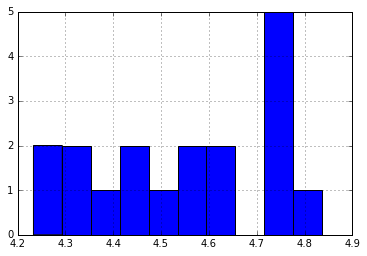

In [16]:
%matplotlib inline
text_stats.avg_word_len.hist()

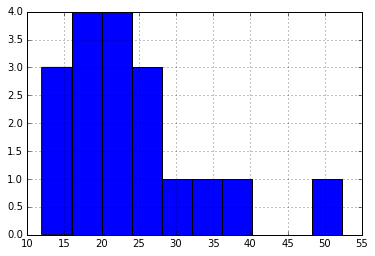

In [17]:
text_stats.avg_sent_len.hist()

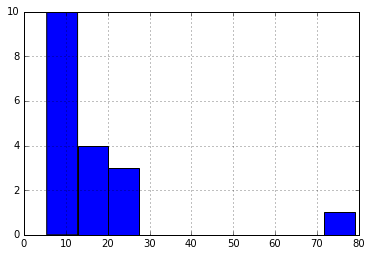

In [18]:
text_stats.lexical_diversity.hist()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

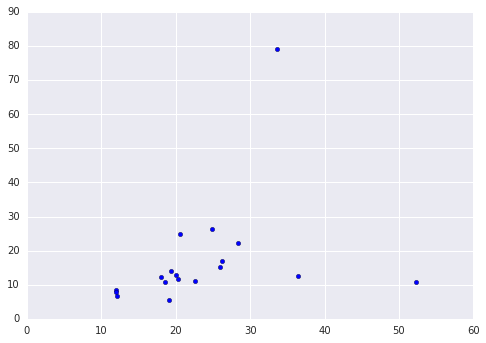

In [20]:
plt.scatter(text_stats.avg_sent_len,text_stats.lexical_diversity)

## 2.5 Inaugural Address Corpus

In [21]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [26]:
# create a conditinoal frequency distribution for words
cfd= nltk.ConditionalFreqDist( (target, fileid[:4]) 
                              for fileid in inaugural.fileids()
                              for w in inaugural.words(fileid)
                              for target in ['america','citizen','freedom']
                              if w.lower().startswith(target))


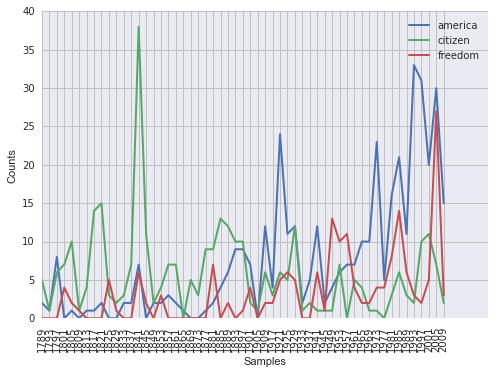

In [27]:
cfd.plot()

## 2. Conditional Probability distributions

In [28]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))

In [30]:
cfd.conditions()

['news',
 'reviews',
 'hobbies',
 'government',
 'learned',
 'religion',
 'lore',
 'belles_lettres',
 'editorial',
 'adventure',
 'science_fiction',
 'fiction',
 'romance',
 'humor',
 'mystery']

In [33]:
len(cfd['news'])

14394

In [35]:
cfd['romance'].most_common()

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496),
 ('with', 460),
 ('you', 456),
 ('for', 410),
 ('at', 402),
 ('He', 366),
 ('on', 362),
 ('him', 339),
 ('said', 330),
 ('!', 316),
 ('--', 291),
 ('be', 289),
 ('as', 282),
 (';', 264),
 ('have', 258),
 ('but', 252),
 ('not', 250),
 ('would', 244),
 ('She', 232),
 ('The', 230),
 ('out', 217),
 ('were', 214),
 ('up', 211),
 ('all', 209),
 ('from', 202),
 ('could', 193),
 ('me', 193),
 ('like', 185),
 ('been', 179),
 ('so', 174),
 ('there', 169),
 ('they', 168),
 ('one', 166),
 ('about', 164),
 ('my', 156),
 ('an', 152),
 ('or', 150),
 ('is', 150),
 ('this', 149),
 ('It', 144),
 ('them', 142),
 ('if', 142),
 ('into', 136),
 ('But', 135),
 ('And', 129),
 ('down', 127),
 ('when', 126),
 ('back', 126),

In [37]:
cfd['romance']['could']

193

### 2.3 Plotting and Tabulating Distributions

In [38]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [39]:
cfd.tabulate(samples=days)

                   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
      adventure         1         0         0         0         0         0         0 
 belles_lettres         0         1         1         2         2         0         4 
      editorial         1         0         1         1         0         3         4 
        fiction         0         2         1         2         1         3         3 
     government         3         1         0         1         0         4         9 
        hobbies         1         0         0         1         3         0         2 
          humor         1         0         0         0         0         3         0 
        learned         0         4         3         1         3         1         1 
           lore         0         1         1         1         2         2         5 
        mystery         5         2         1         1         2         2         4 
           news        54        43        

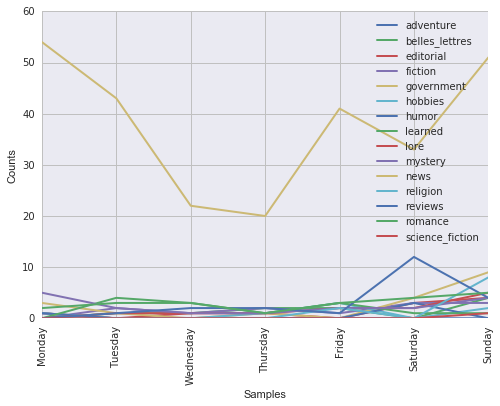

In [40]:
cfd.plot(samples=days)